In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import torch.optim as op

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

## Critcial Point

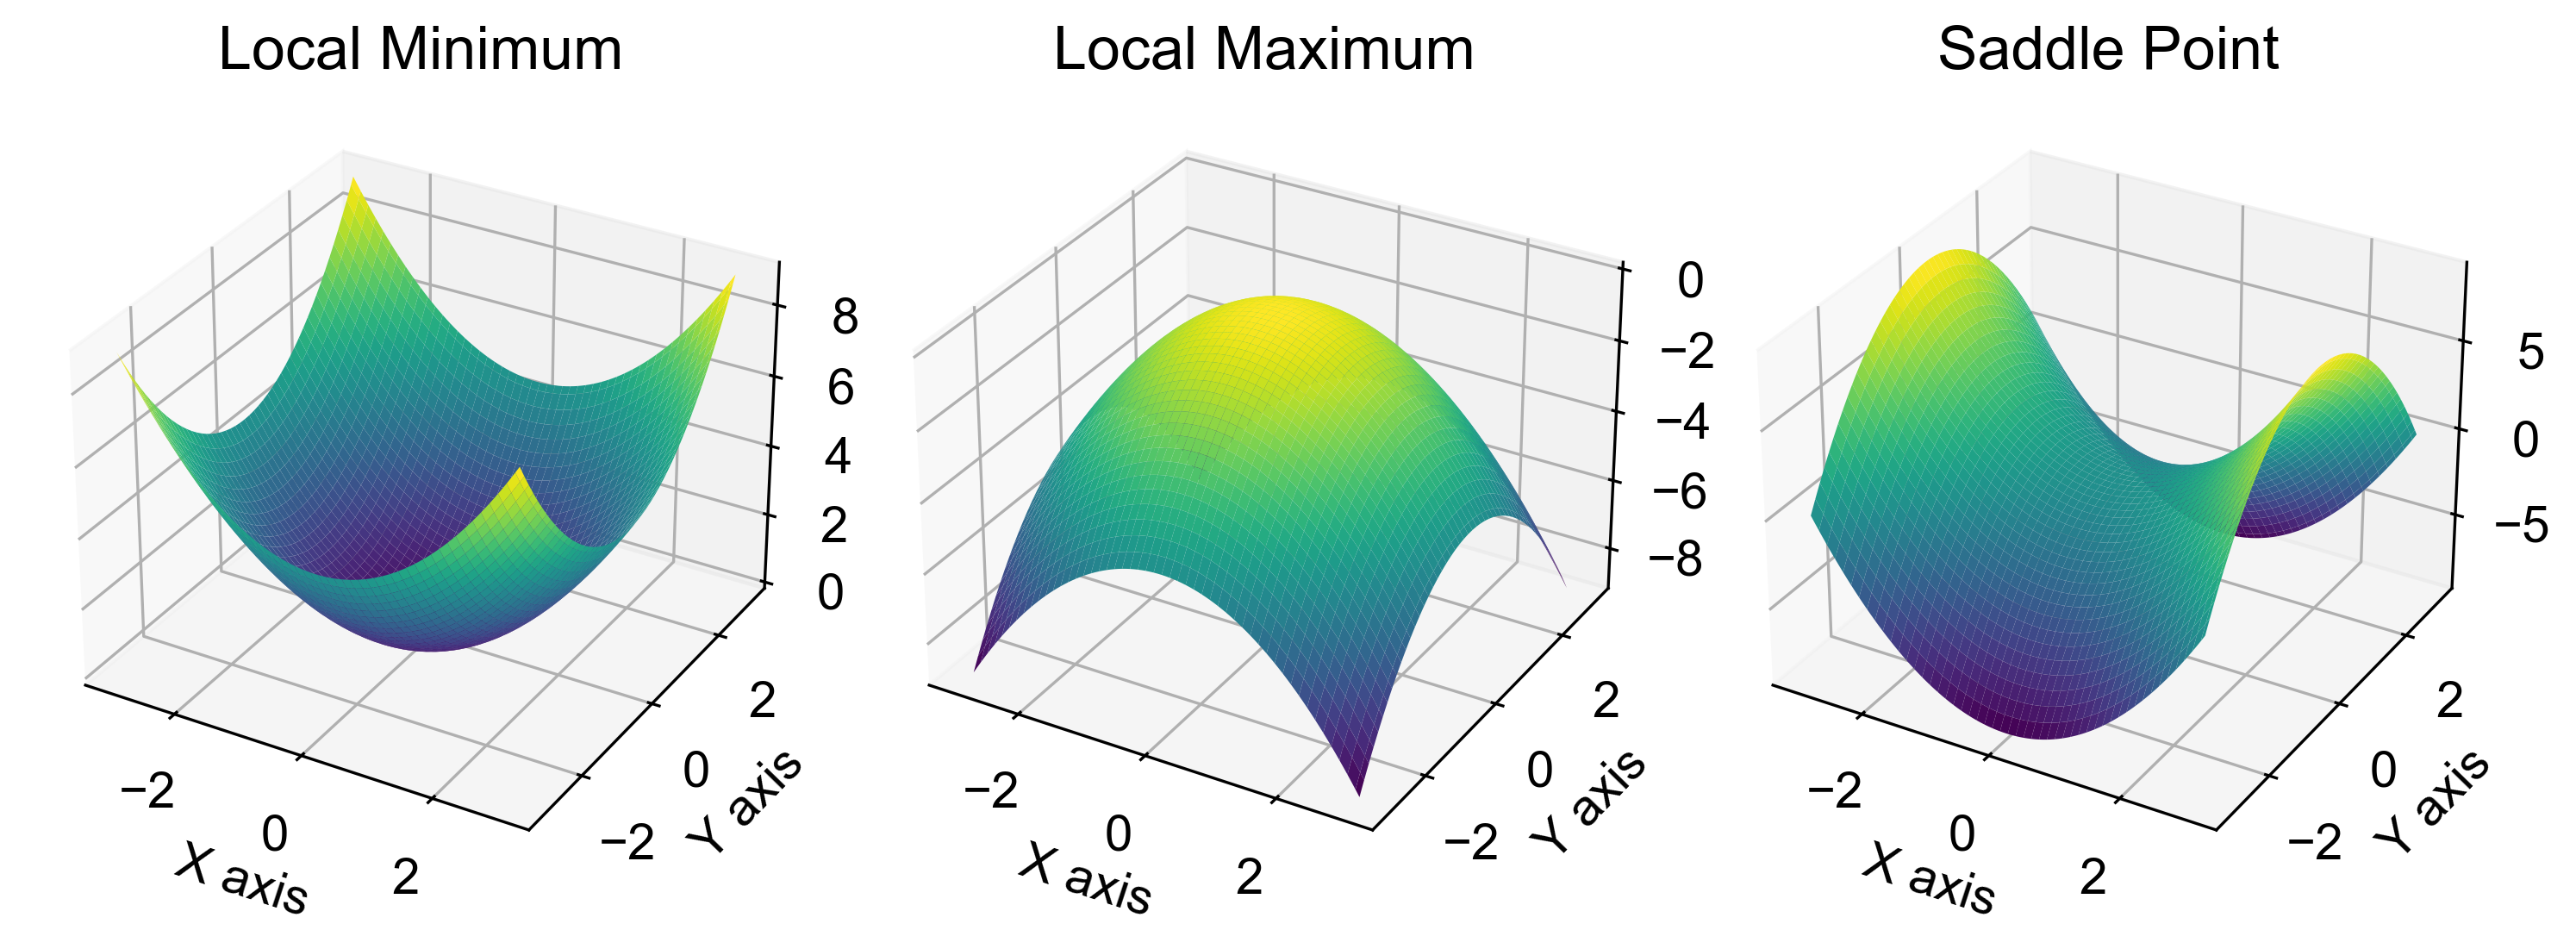

In [2]:
def local_minimum(x, y):
    return 0.5*(x**2 + y**2)

def local_maximum(x, y):
    return -0.5 * (x**2 + y**2)

def saddle_point(x, y):
    return x**2 - y**2

def plot_surface(funcs, x_range, y_range, title):
    X = np.linspace(x_range[0], x_range[1], 100)
    Y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(X, Y)
    Z = [func(X, Y) for func in funcs]

    fig = plt.figure(figsize=(10, 6), dpi=300)
    for i, z in enumerate(Z):
        ax = fig.add_subplot(1, len(Z), i+1, projection='3d')
        ax.plot_surface(X, Y, z, cmap='viridis')
        ax.set_title(f"{title[i]}")
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')

    plt.tight_layout()
    plt.show()

functions = [local_minimum, local_maximum, saddle_point]
titles = ['Local Minimum', 'Local Maximum', 'Saddle Point']
plot_surface(functions, (-3, 3), (-3, 3), titles)

## Gradient Descent

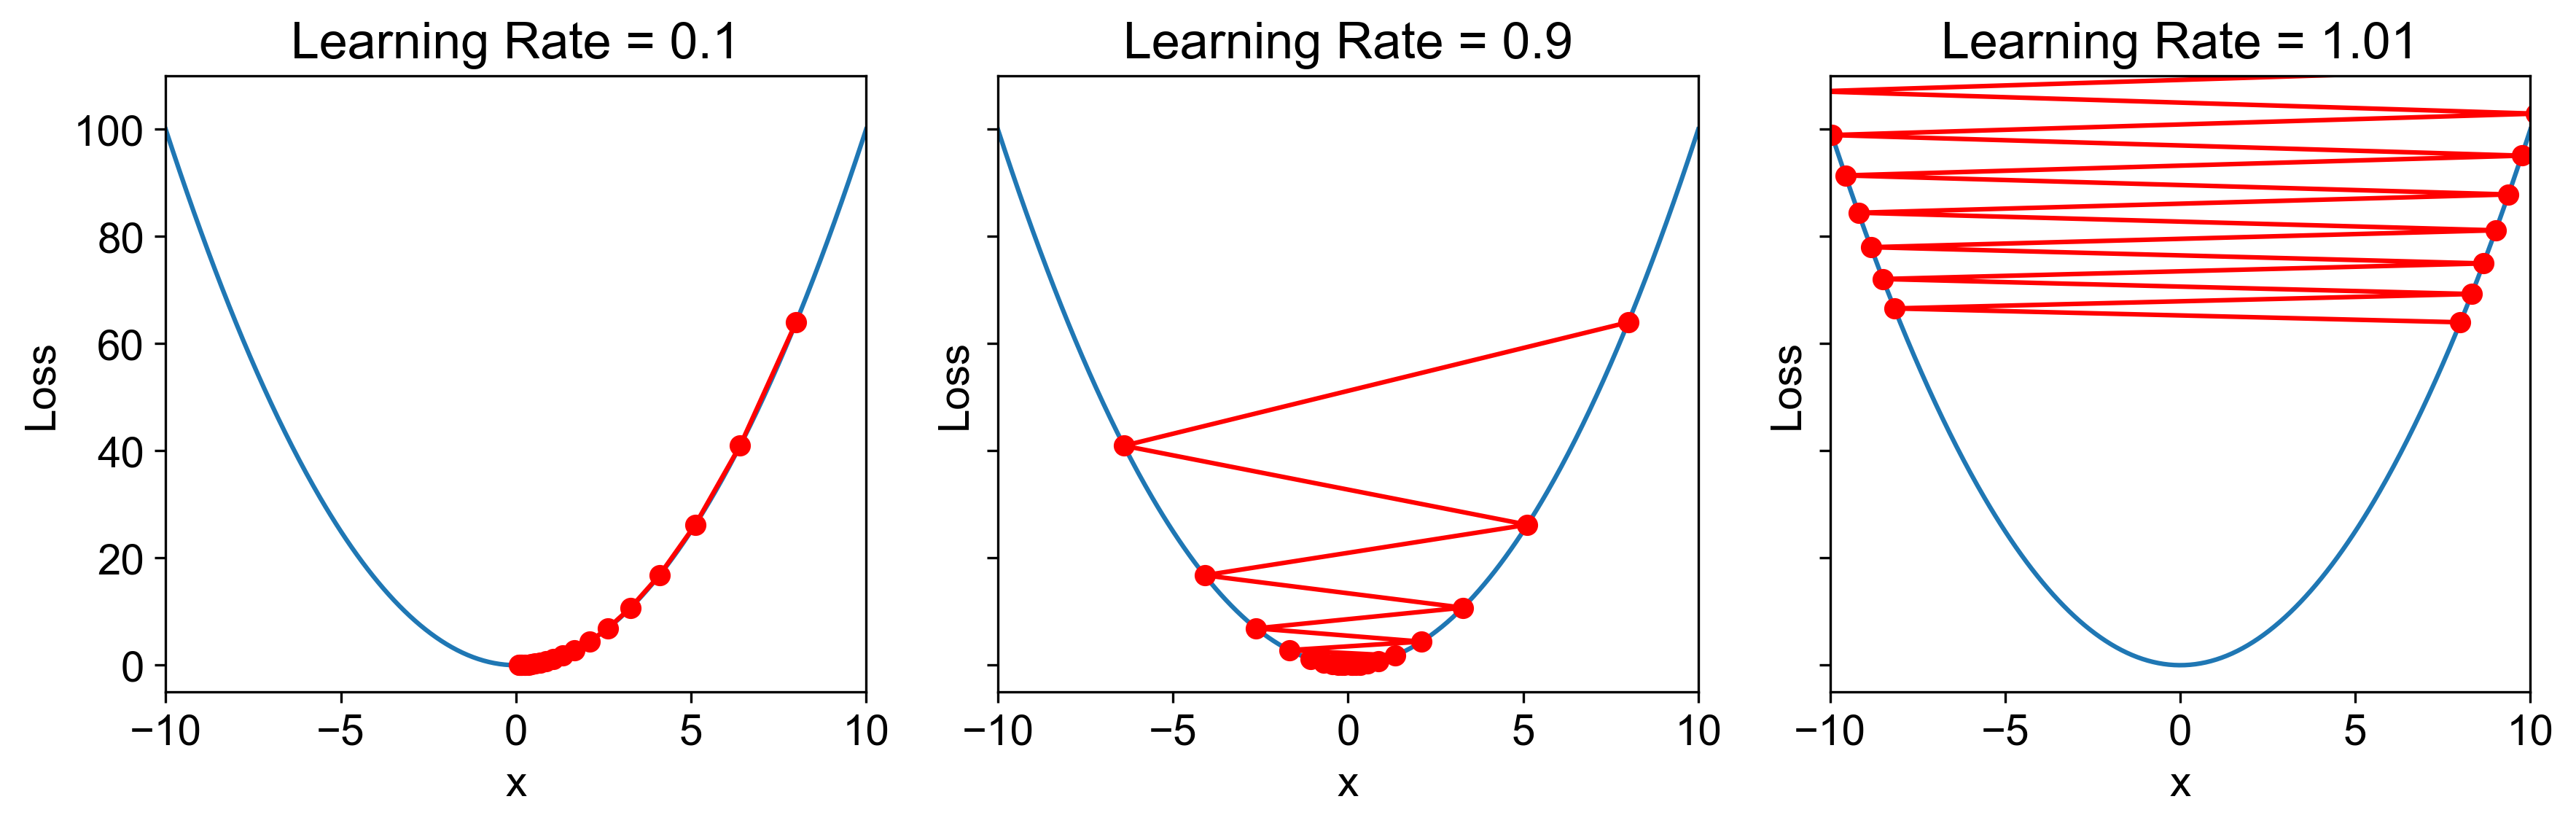

In [3]:
def loss_1d(x):
    return x**2

def loss_gradient_1d(x):
    return 2*x

def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    history = [x]
    for _ in range(num_iterations):
        grad = loss_gradient_1d(x)
        x = x - learning_rate * grad
        history.append(x)
    x = np.array(history)
    y = loss_1d(x)
    return x, y

x0 = 10
x = np.linspace(-x0, x0, 400)
y = loss_1d(x)
eta = [0.1,0.9,1.01]
xv = []
yv = []
for lr in eta:
    x_values, y_values = gradient_descent(starting_point=0.8*x0, learning_rate=lr, num_iterations=20)
    xv.append(x_values)
    yv.append(y_values)


plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(1,3,figsize=(12, 4),sharey=True,dpi=300)
for i in range(3):
    ax[i].plot(x, y, '-')
    ax[i].plot(xv[i], yv[i], 'ro-')
    ax[i].set_title(f'Learning Rate = {eta[i]}')
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('Loss')
    ax[i].set_xlim([-x0, x0])
    ax[i].set_ylim([-5, 110])

plt.tight_layout()
plt.show()

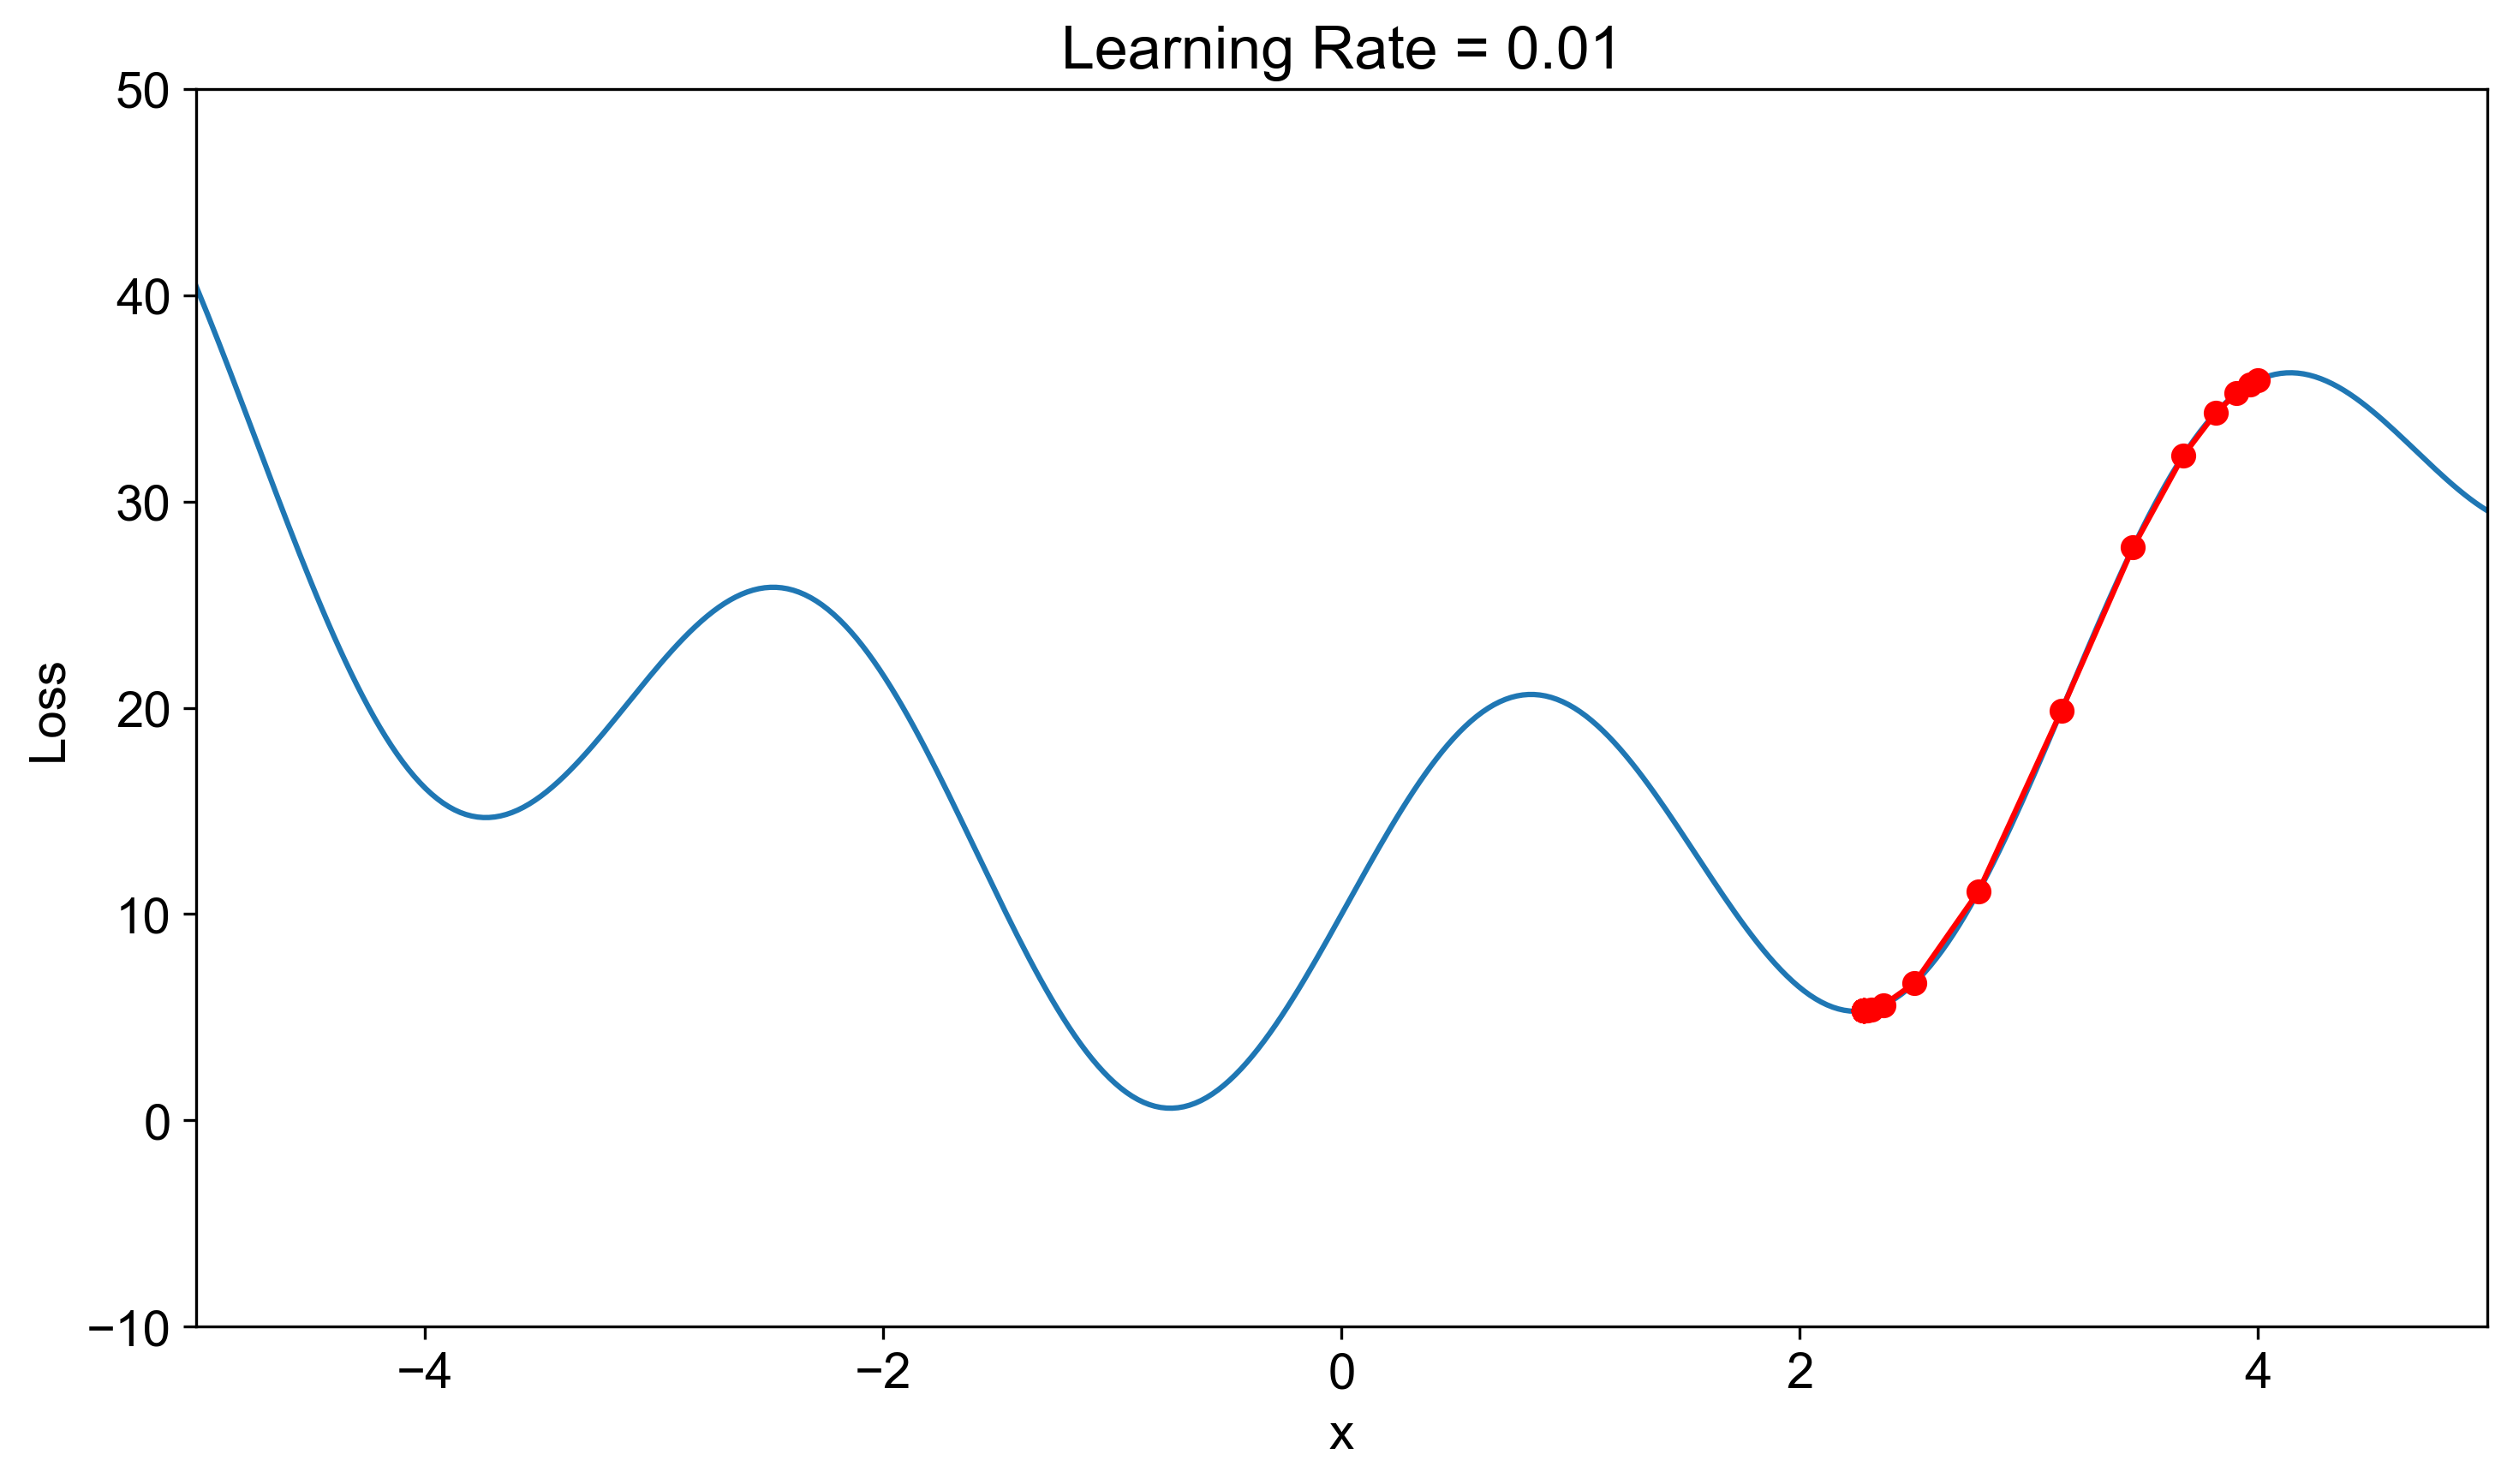

In [4]:
def loss_1d(x):
    return x**2 + 10*np.sin(2*x)+10

def loss_gradient_1d(x):
    return 2*x + 30*np.cos(2*x)

eta = 0.01
x0 = 5
x_values, y_values = gradient_descent(starting_point=0.8*x0, learning_rate=eta, num_iterations=50)
x = np.linspace(-x0, x0, 400)
y = loss_1d(x)

fig, ax = plt.subplots(1,1,figsize=(10, 6),dpi=300)
ax.plot(x, y, '-')
ax.plot(x_values, y_values, 'ro-')
ax.set_title(f'Learning Rate = {eta}')
ax.set_xlabel('x')
ax.set_ylabel('Loss')
ax.set_xlim([-x0, x0])
ax.set_ylim([-10, 50])
plt.tight_layout()
plt.show()


In [5]:
def f_2d(x1, x2):
    '''original function to minimize'''
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):
    '''the gradient dfdx1 and dfdx2'''
    dfdx1 = 0.2 * x1
    dfdx2 = 4 * x2
    return dfdx1, dfdx2

def train_2d(trainer, lr):
    """Train a 2d object function with a customized trainer"""
    x1 = -5
    x2 = -2
    s_x1, s_x2 = 0, 0
    res = [(x1, x2)]
    for i in range(50):
        # trainer 可以是 SGD, Momentum, RMSProp, Adam 等
        x1, x2, s_x1, s_x2, lr = trainer(x1, x2, s_x1, s_x2, lr)
        res.append((x1, x2))
    return res

def plot_2d(rest, figsize=(10, 6), title=None):
    if len(rest) == 1:
        res = rest[0]
        x1_, x2_ = zip(*res)
        fig = plt.figure(figsize=figsize, dpi=300)
        plt.plot([0], [0], 'r*', ms=15)
        plt.text(0.0, 0.25, 'minimum', color='w')
        # 绘制开始位置
        plt.plot(x1_[0], x2_[0], 'ro', ms=10)
        plt.text(x1_[0]+0.1, x2_[0]+0.2, 'start', color='w')
        plt.plot(x1_, x2_, '-o', color='#ff7f0e')
        # 绘制结束位置
        plt.plot(x1_[-1], x2_[-1], 'wo')
        plt.text(x1_[-1], x2_[-1]-0.25, 'end', color='w')
        # 绘制训练过程动画的背景：0.1*x1**2 + 2*x2**2 等高图
        x1 = np.linspace(-5.5, 3, 50)
        x2 = np.linspace(min(-3.0, min(x2_) - 1), max(3.0, max(x2_) + 1), 100)
        x1, x2 = np.meshgrid(x1, x2)
        plt.contourf(x1, x2, f_2d(x1, x2))
        plt.xlabel(r'$x_1$')
        plt.ylabel(r'$x_2$')
        plt.title(title)
        plt.show()
        return
    else:
        fig, ax = plt.subplots(1, len(rest), figsize=(5.5 * len(rest), 5), dpi=300)
        for i in range(len(rest)):
            res = rest[i]
            x1_, x2_ = zip(*res)
            ax[i].plot([0], [0], 'r*', ms=15)
            ax[i].text(0.0, 0.25, 'minimum', color='w')
            # 绘制开始位置
            ax[i].plot(x1_[0], x2_[0], 'ro', ms=10)
            ax[i].text(x1_[0]+0.1, x2_[0]+0.2, 'start', color='w')
            ax[i].plot(x1_, x2_, '-o', color='#ff7f0e')
            # 绘制结束位置
            ax[i].plot(x1_[-1], x2_[-1], 'wo')
            if max(x2_) - min(x2_) < 0.5:
                ax[i].text(x1_[-1], x2_[-1]+0.25, 'end', color='w')
            # ax[i].text(x1_[-1], x2_[-1]-0.25, 'end', color='w')
            # 绘制训练过程动画的背景：0.1*x1**2 + 2*x2**2 等高图
            x1 = np.linspace(-5.5, 3, 50)
            x2 = np.linspace(min(-3.0, min(x2_) - 1), max(3.0, max(x2_) + 1), 100)
            x1, x2 = np.meshgrid(x1, x2)
            ax[i].contourf(x1, x2, f_2d(x1, x2))
            ax[i].set_xlabel(r'$x_1$')
            ax[i].set_ylabel(r'$x_2$')
            # ax[i].set_xlim([-5.5, 3])
            # ax[i].set_ylim([-3, 3])
            ax[i].set_title(title[i] if title else None)
        plt.show()
        

In [6]:
def sgd(x1, x2, s1, s2, lr):
    '''随机梯度下降 sgd
    :(x1, x2): 当前位置
    :(s1, s2): 当前速度，动量机制使用'''
    dfdx1, dfdx2 = f_grad(x1, x2)
    return (x1 - lr * dfdx1, x2 - lr * dfdx2, 0, 0, lr)

def visualize_gradient_descent(lrt=0.05):
    '''可视化随机梯度下降学习过程'''
    if len(lrt) == 1:
        res = train_2d(sgd, lrt)
    else:
        res = []
        for lr in lrt:
            res.append(train_2d(sgd, lr))
    plot_2d(res, title=[f'Learning rate={lr}' for lr in lrt])

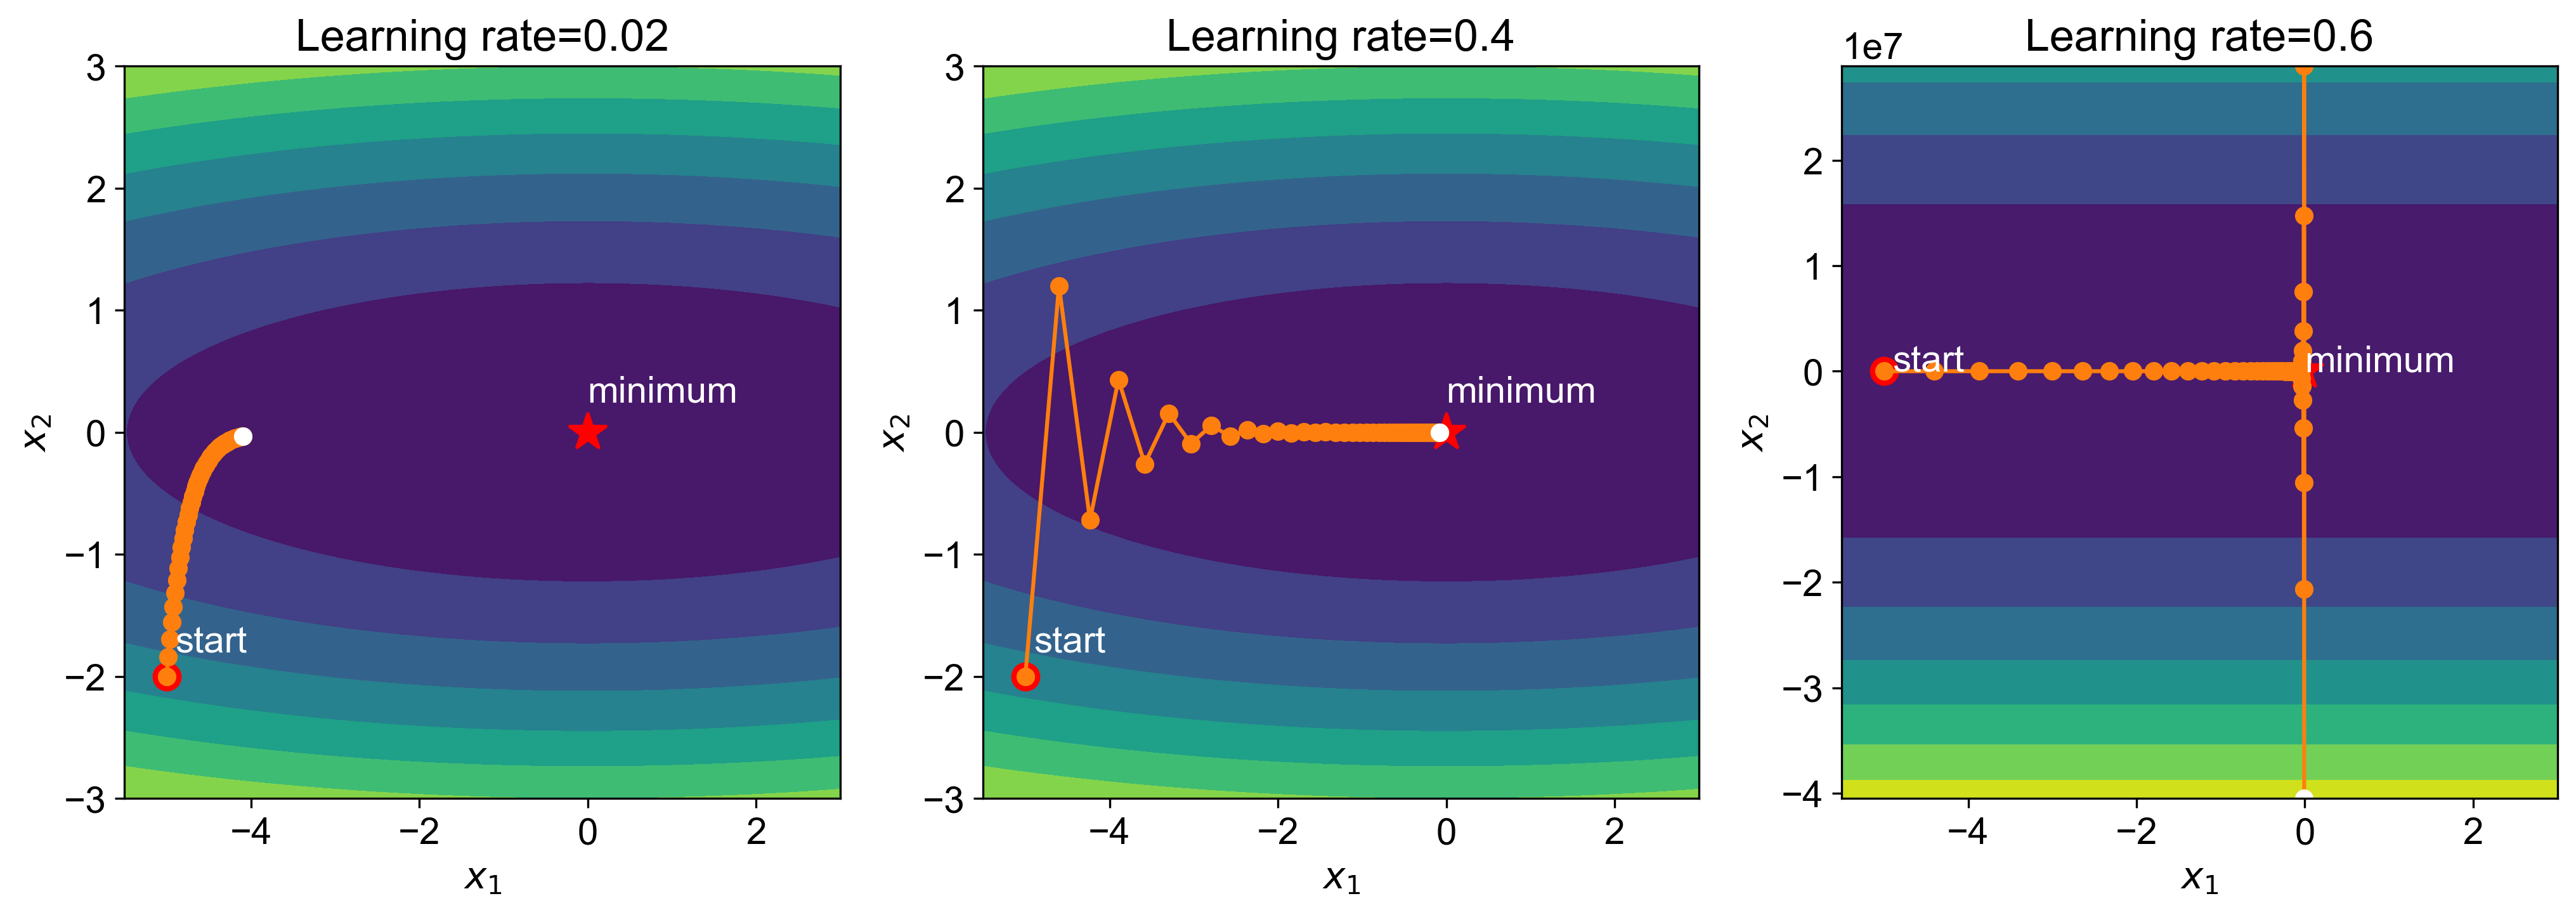

In [7]:
visualize_gradient_descent(lrt=[0.02, 0.4, 0.6])

## Momentum

In [8]:
def momentum(x1, x2, v1, v2, lr, gamma):
    '''带动量机制的 SGD 算法的实现'''
    dfdx1, dfdx2 = f_grad(x1, x2)
    v1 = gamma * v1 + lr * dfdx1
    v2 = gamma * v2 + lr * dfdx2
    x1 = x1 - v1
    x2 = x2 - v2
    return (x1, x2, v1, v2, lr)

In [9]:
def visualize_sgd_momentum(lrt, gammat):
    '''lr: learning rate
    gamma: parameter for momentum sgd'''  
    if len(lrt) ==1:
        lr = lrt[0]
        gamma = gammat[0]
        trainer = lambda x1, x2, v1, v2, lr: momentum(x1, x2, v1, v2, lr, gamma)
        res = train_2d(trainer, lr)
        plot_2d([res], title=rf'$\eta={lr}, \gamma={gamma}$')
    else:
        res = []
        for lr, gamma in zip(lrt, gammat):
            trainer = lambda x1, x2, v1, v2, lr: momentum(x1, x2, v1, v2, lr, gamma)
            res.append(train_2d(trainer, lr))
        plot_2d(res, title=[rf'$\eta={lr}, \gamma={gamma}$' for lr, gamma in zip(lrt, gammat)])

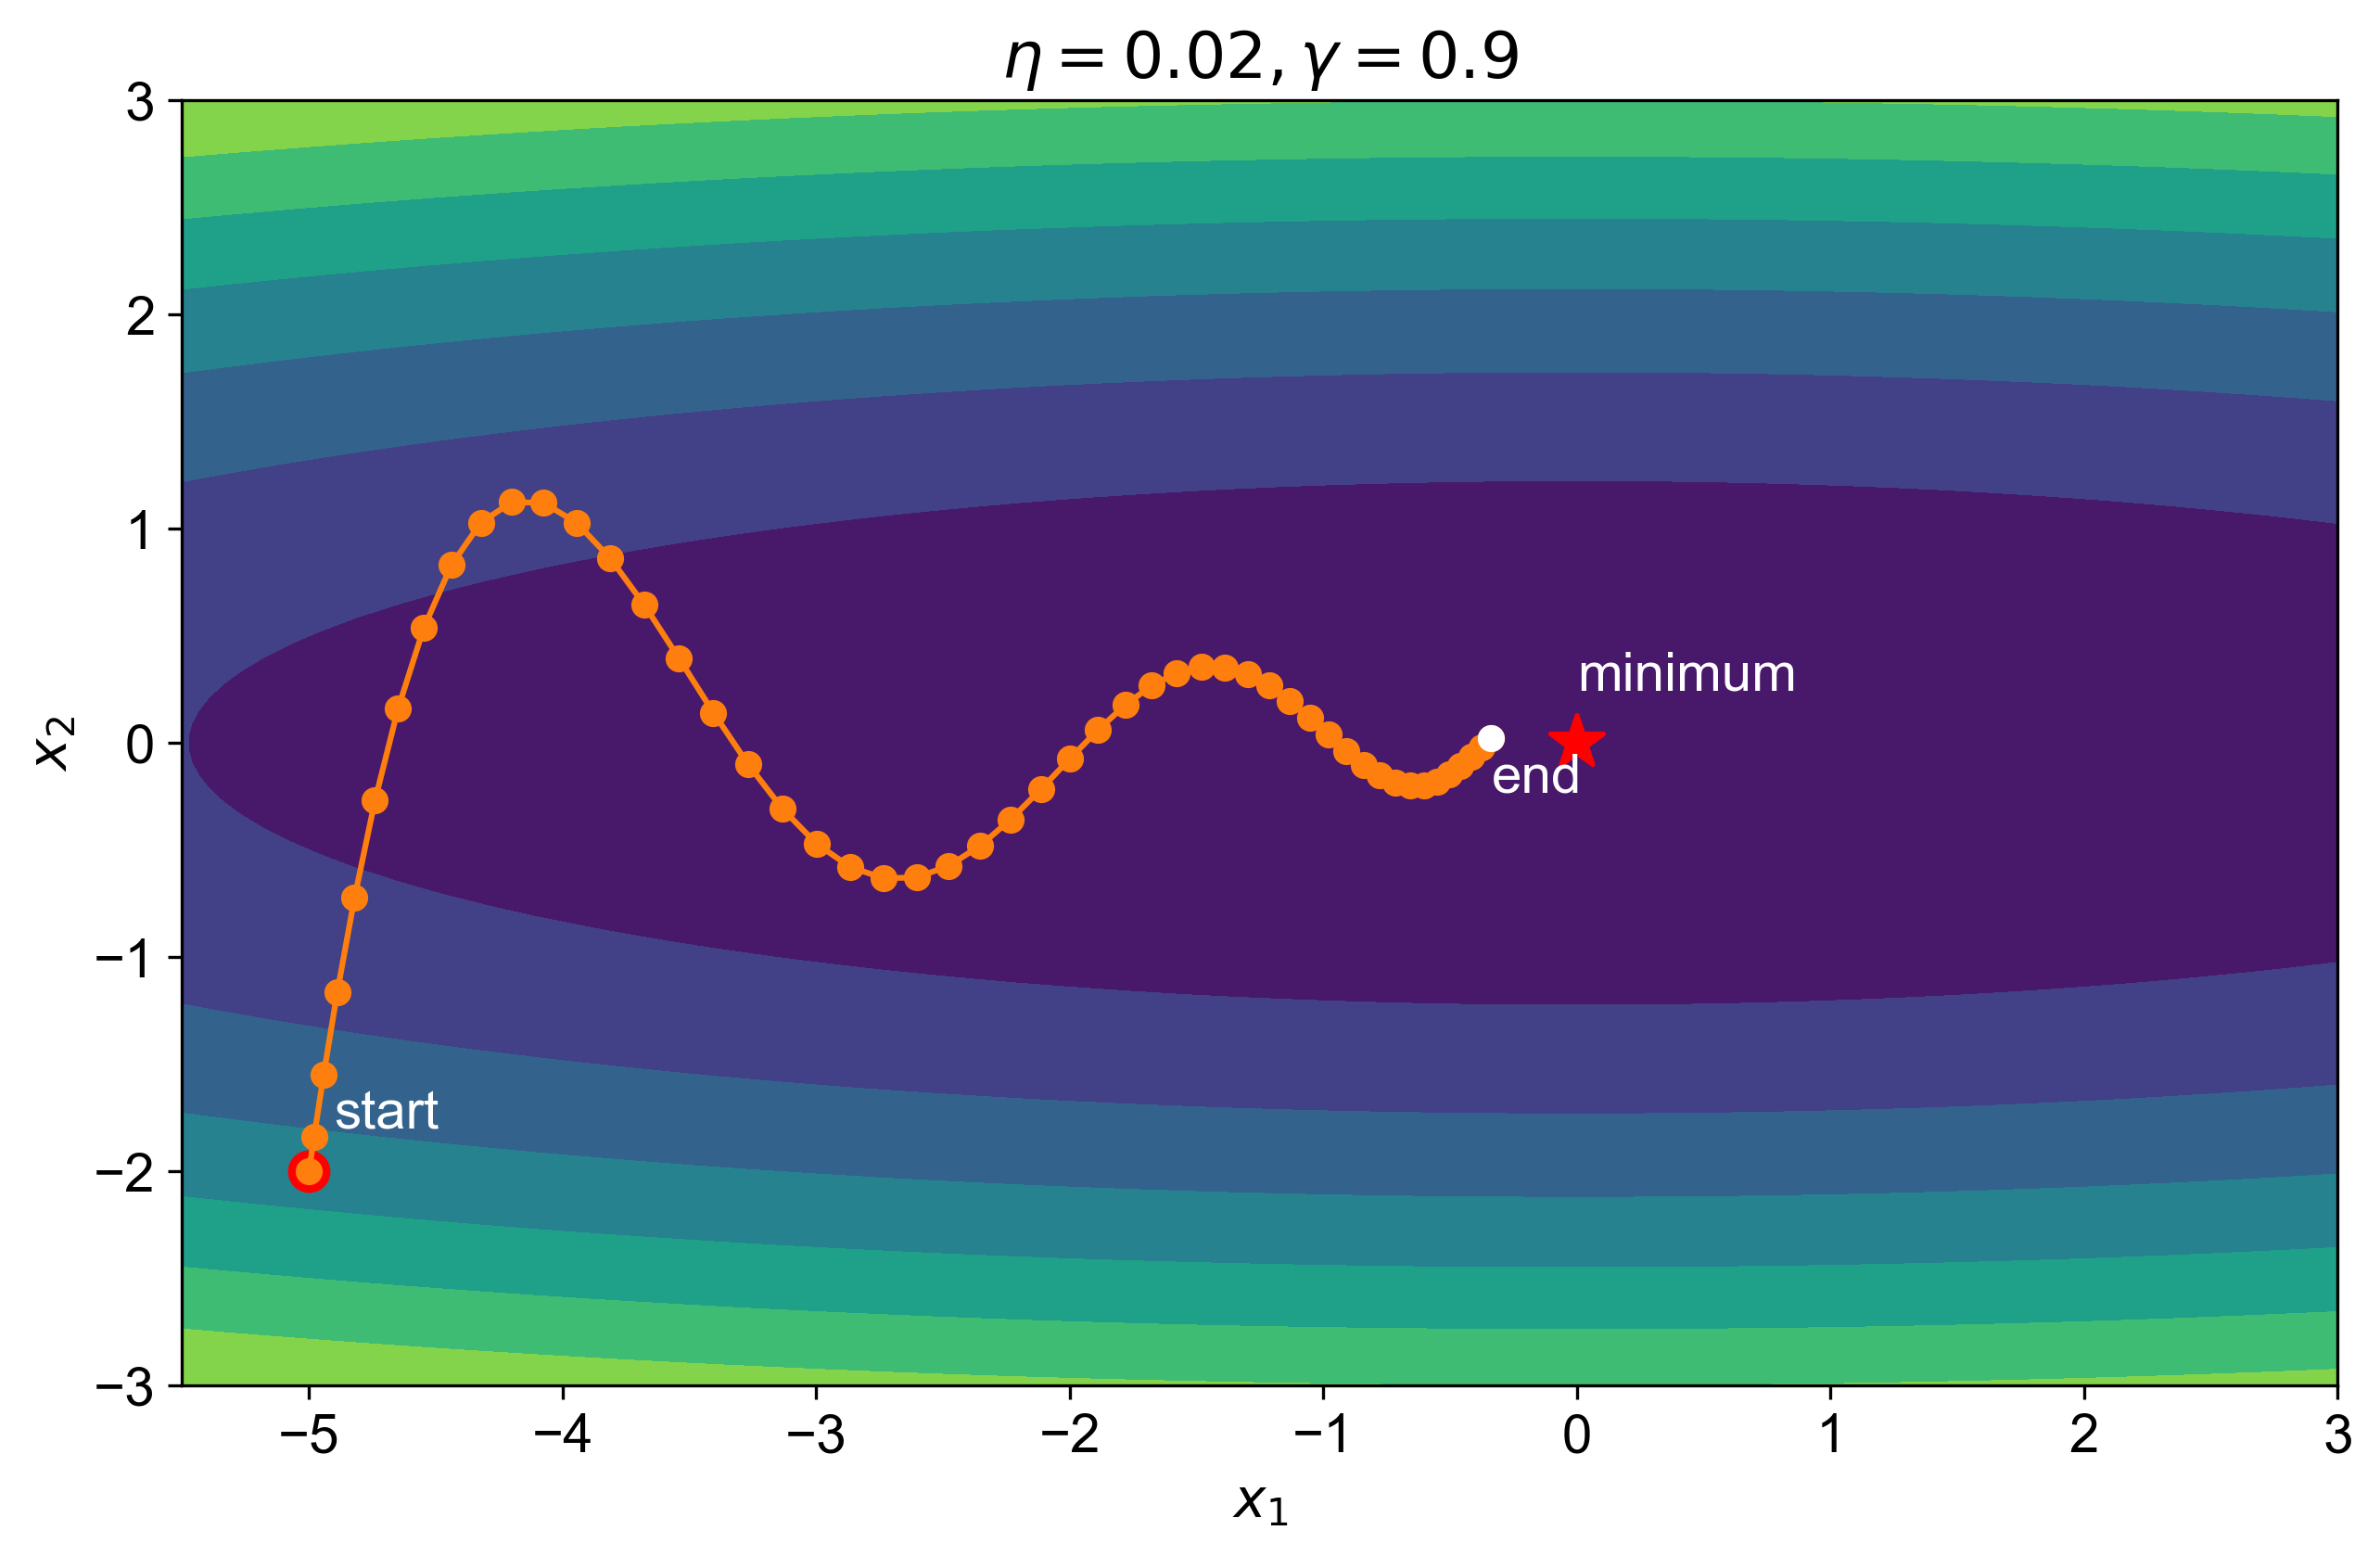

In [10]:
visualize_sgd_momentum(lrt=[0.02], gammat=[0.9])

# Adagrad

In [56]:
def f_2d_t(x1, x2):
    '''original function to minimize'''
    return 0.1 * x1 ** 2 + 2000 * x2 ** 2

def f_grad_t(x1, x2):
    '''the gradient dfdx1 and dfdx2'''
    dfdx1 = 0.2 * x1
    dfdx2 = 4000 * x2 
    return dfdx1, dfdx2

def train_2d_t(trainer, lr):
    """Train a 2d object function with a customized trainer"""
    x1 = -300
    x2 = -2
    s_x1, s_x2 = 0, 0
    res = [(x1, x2)]
    lr_0 = lr
    for i in range(30000):
        # trainer 可以是 SGD, Momentum, RMSProp, Adam 等
        x1, x2, s_x1, s_x2, lr = trainer(x1, x2, s_x1, s_x2, lr, i)
        lr = lr_0 / (np.log(i+1)+1)
        res.append((x1, x2))
    return res

def plot_2d(rest, figsize=(10, 6), title=None):
    if len(rest) == 1:
        res = rest[0]
        x1_, x2_ = zip(*res)
        fig = plt.figure(figsize=figsize, dpi=300)
        plt.plot([0], [0], 'r*', ms=15)
        plt.text(0.0, 0.25, 'minimum', color='w')
        # 绘制开始位置
        plt.plot(x1_[0], x2_[0], 'ro', ms=10)
        plt.text(x1_[0]+0.1, x2_[0]+0.2, 'start', color='w')
        plt.plot(x1_, x2_, '-o', color='#ff7f0e')
        # 绘制结束位置
        plt.plot(x1_[-1], x2_[-1], 'wo')
        plt.text(x1_[-1], x2_[-1]-0.25, 'end', color='w')
        # 绘制训练过程动画的背景：0.1*x1**2 + 2*x2**2 等高图
        x1 = np.linspace(np.min(x1_)-30, np.max(x1_)+50, 50)
        x2 = np.linspace(min(-3.0, min(x2_) - 1), max(3.0, max(x2_) + 1), 100)
        x1, x2 = np.meshgrid(x1, x2)
        plt.contourf(x1, x2, f_2d_t(x1, x2))
        plt.xlabel(r'$x_1$')
        plt.ylabel(r'$x_2$')
        plt.title(title)
        plt.show()
        return
    else:
        fig, ax = plt.subplots(1, len(rest), figsize=(5.5 * len(rest), 5), dpi=300)
        for i in range(len(rest)):
            res = rest[i]
            x1_, x2_ = zip(*res)
            ax[i].plot([0], [0], 'r*', ms=15)
            ax[i].text(0.0, 0.25, 'minimum', color='w')
            # 绘制开始位置
            ax[i].plot(x1_[0], x2_[0], 'ro', ms=10)
            ax[i].text(x1_[0]+0.1, x2_[0]+0.2, 'start', color='w')
            ax[i].plot(x1_, x2_, '-o', color='#ff7f0e')
            # 绘制结束位置
            ax[i].plot(x1_[-1], x2_[-1], 'wo')
            if max(x2_) - min(x2_) < 0.5:
                ax[i].text(x1_[-1], x2_[-1]+0.25, 'end', color='w')
            # ax[i].text(x1_[-1], x2_[-1]-0.25, 'end', color='w')
            # 绘制训练过程动画的背景：0.1*x1**2 + 2*x2**2 等高图
            x1 = np.linspace(-5.5, 3, 50)
            x2 = np.linspace(min(-3.0, min(x2_) - 1), max(3.0, max(x2_) + 1), 100)
            x1, x2 = np.meshgrid(x1, x2)
            ax[i].contourf(x1, x2, f_2d(x1, x2))
            ax[i].set_xlabel(r'$x_1$')
            ax[i].set_ylabel(r'$x_2$')
            # ax[i].set_xlim([-5.5, 3])
            # ax[i].set_ylim([-3, 3])
            ax[i].set_title(title[i] if title else None)
        plt.show()
        

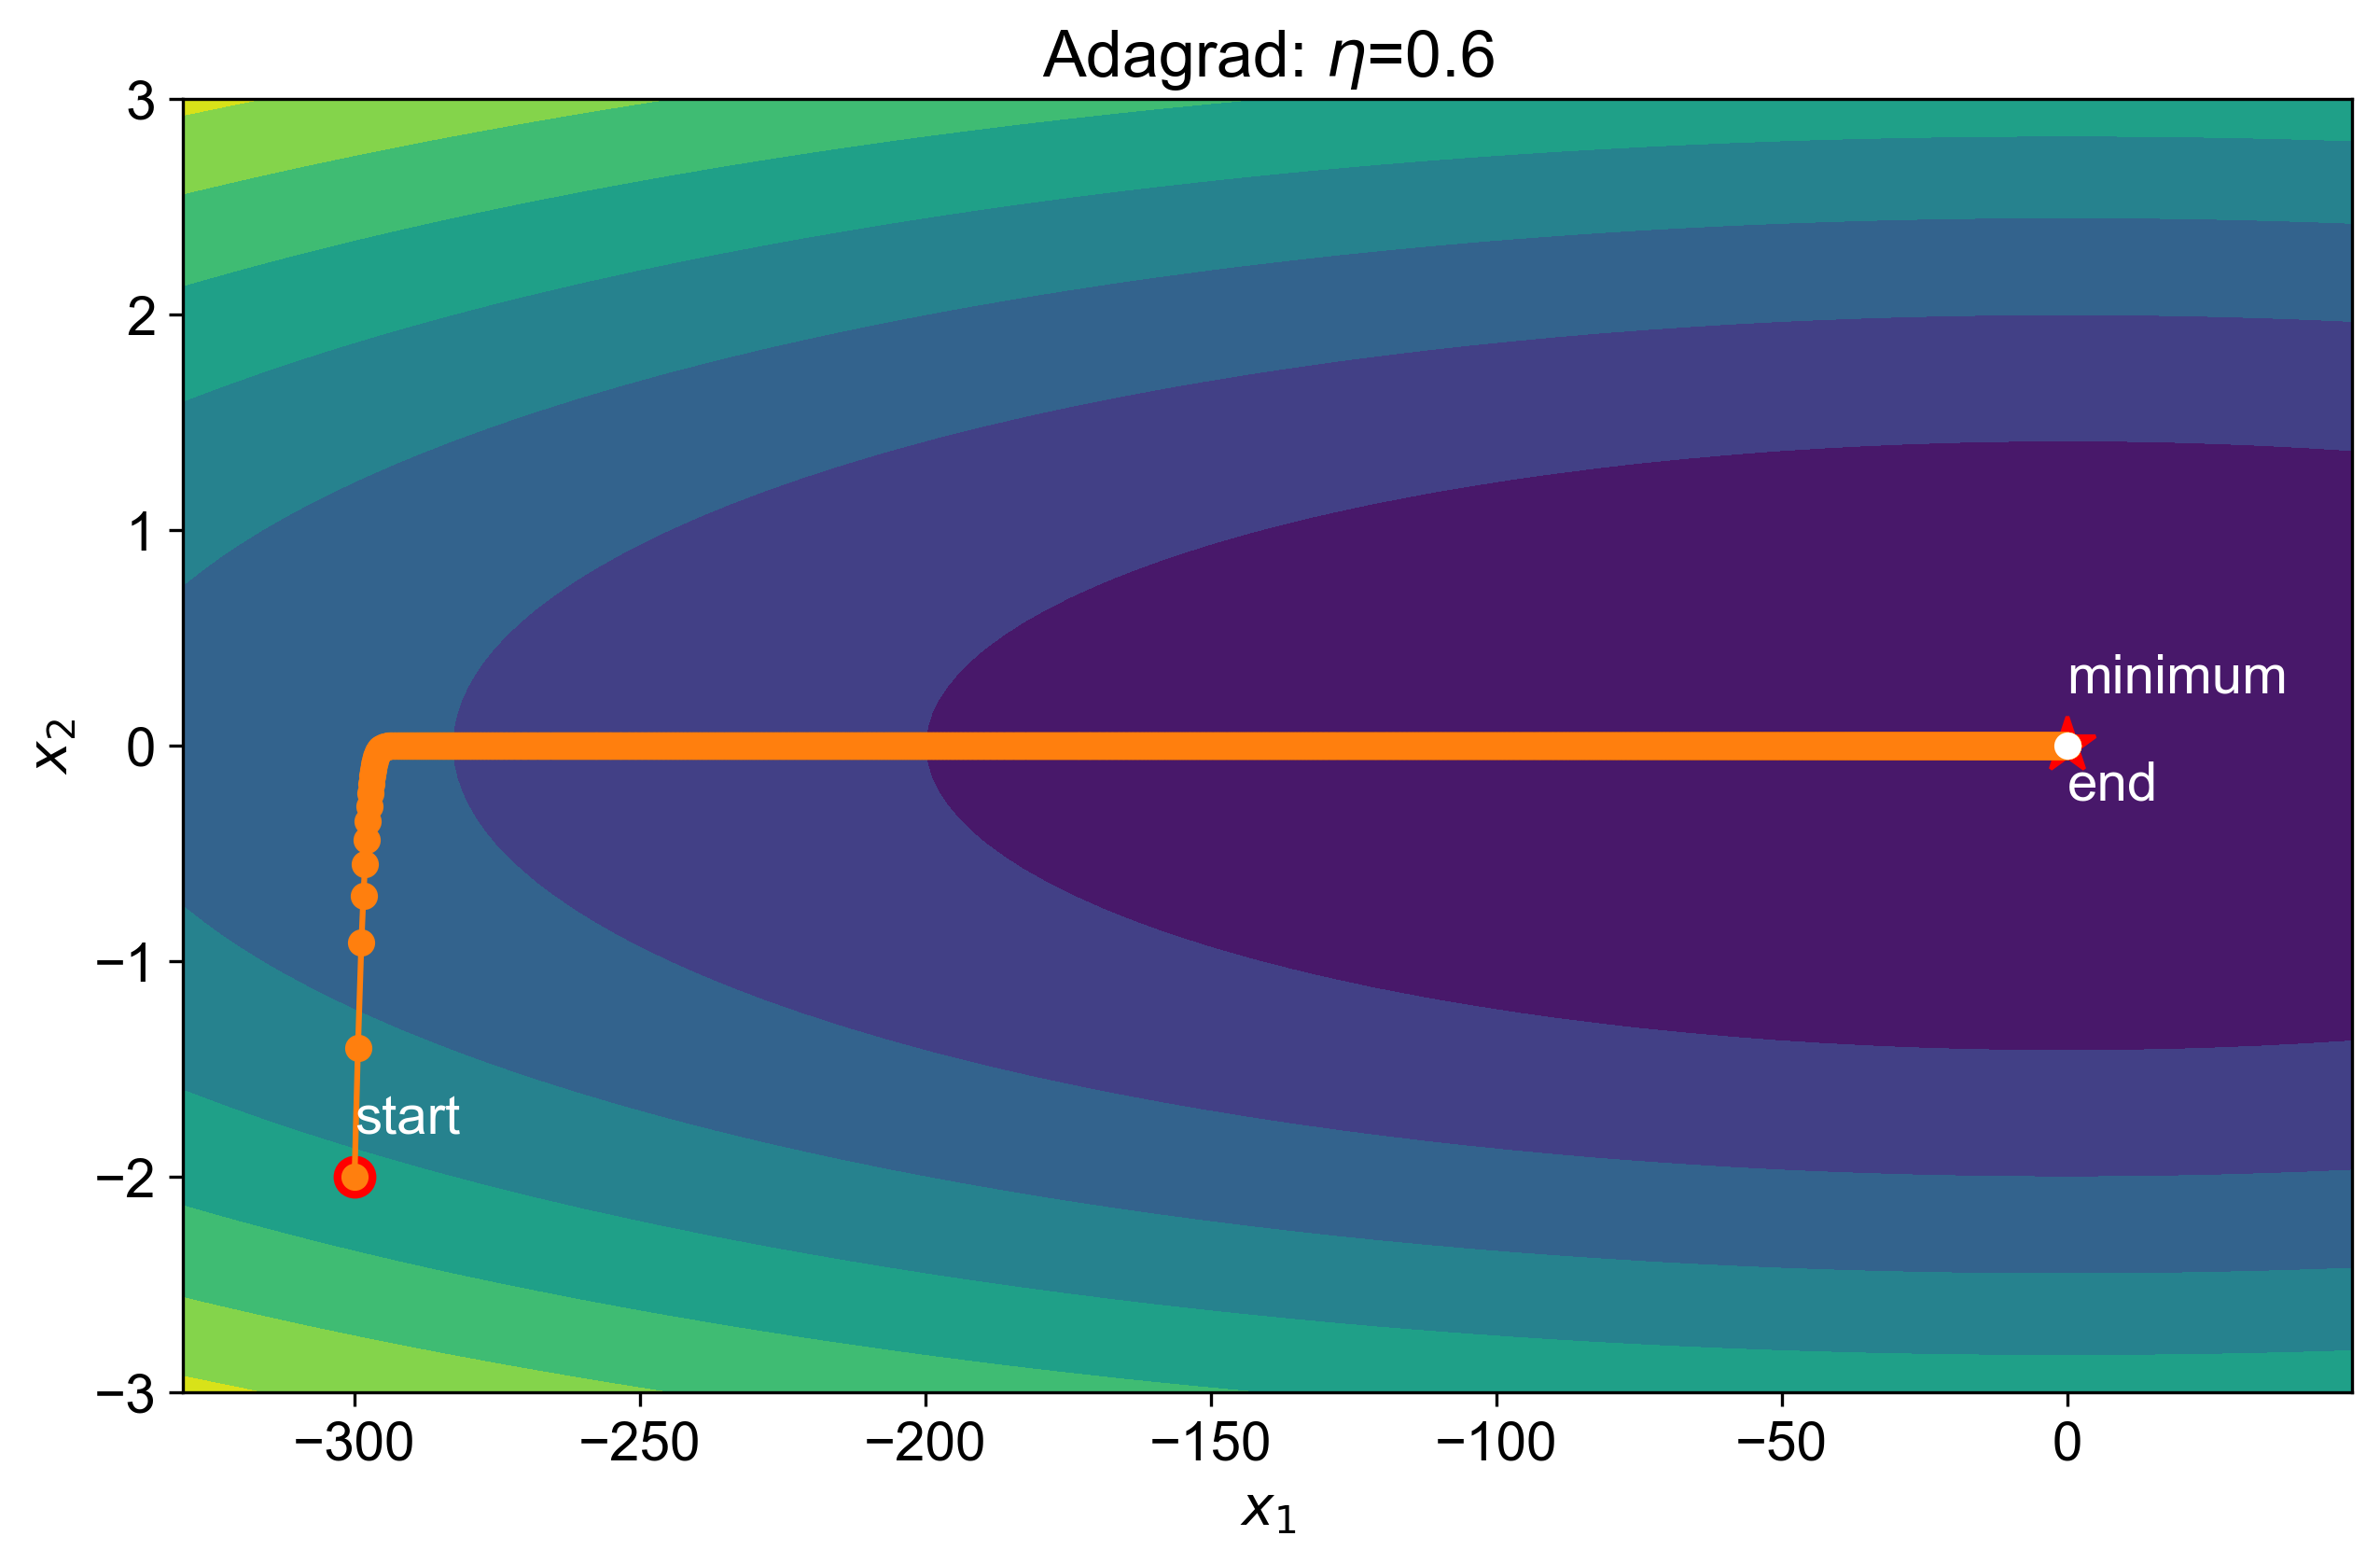

In [57]:
def visualize_adagrad(lrt):
    def adagrad(x1, x2, s1, s2, lr, i):
        '''Adagrad optimizer'''
        dfdx1, dfdx2 = f_grad_t(x1, x2)
        s1 += dfdx1 ** 2
        s2 += dfdx2 ** 2
        x1 = x1 - lr * dfdx1 / (np.sqrt(s1/(i+1)) + 1e-8)
        x2 = x2 - lr * dfdx2 / (np.sqrt(s2/(i+1)) + 1e-8)
        # x1 = x1 - lr * dfdx1 / (np.sqrt(s1) + 1e-8)
        # x2 = x2 - lr * dfdx2 / (np.sqrt(s2) + 1e-8)
        return (x1, x2, s1, s2, lr)

    res = train_2d_t(adagrad, lrt)
    plot_2d([res], title=rf'Adagrad: $\eta$={lrt}')

visualize_adagrad(lrt=0.6)

## RMSProp

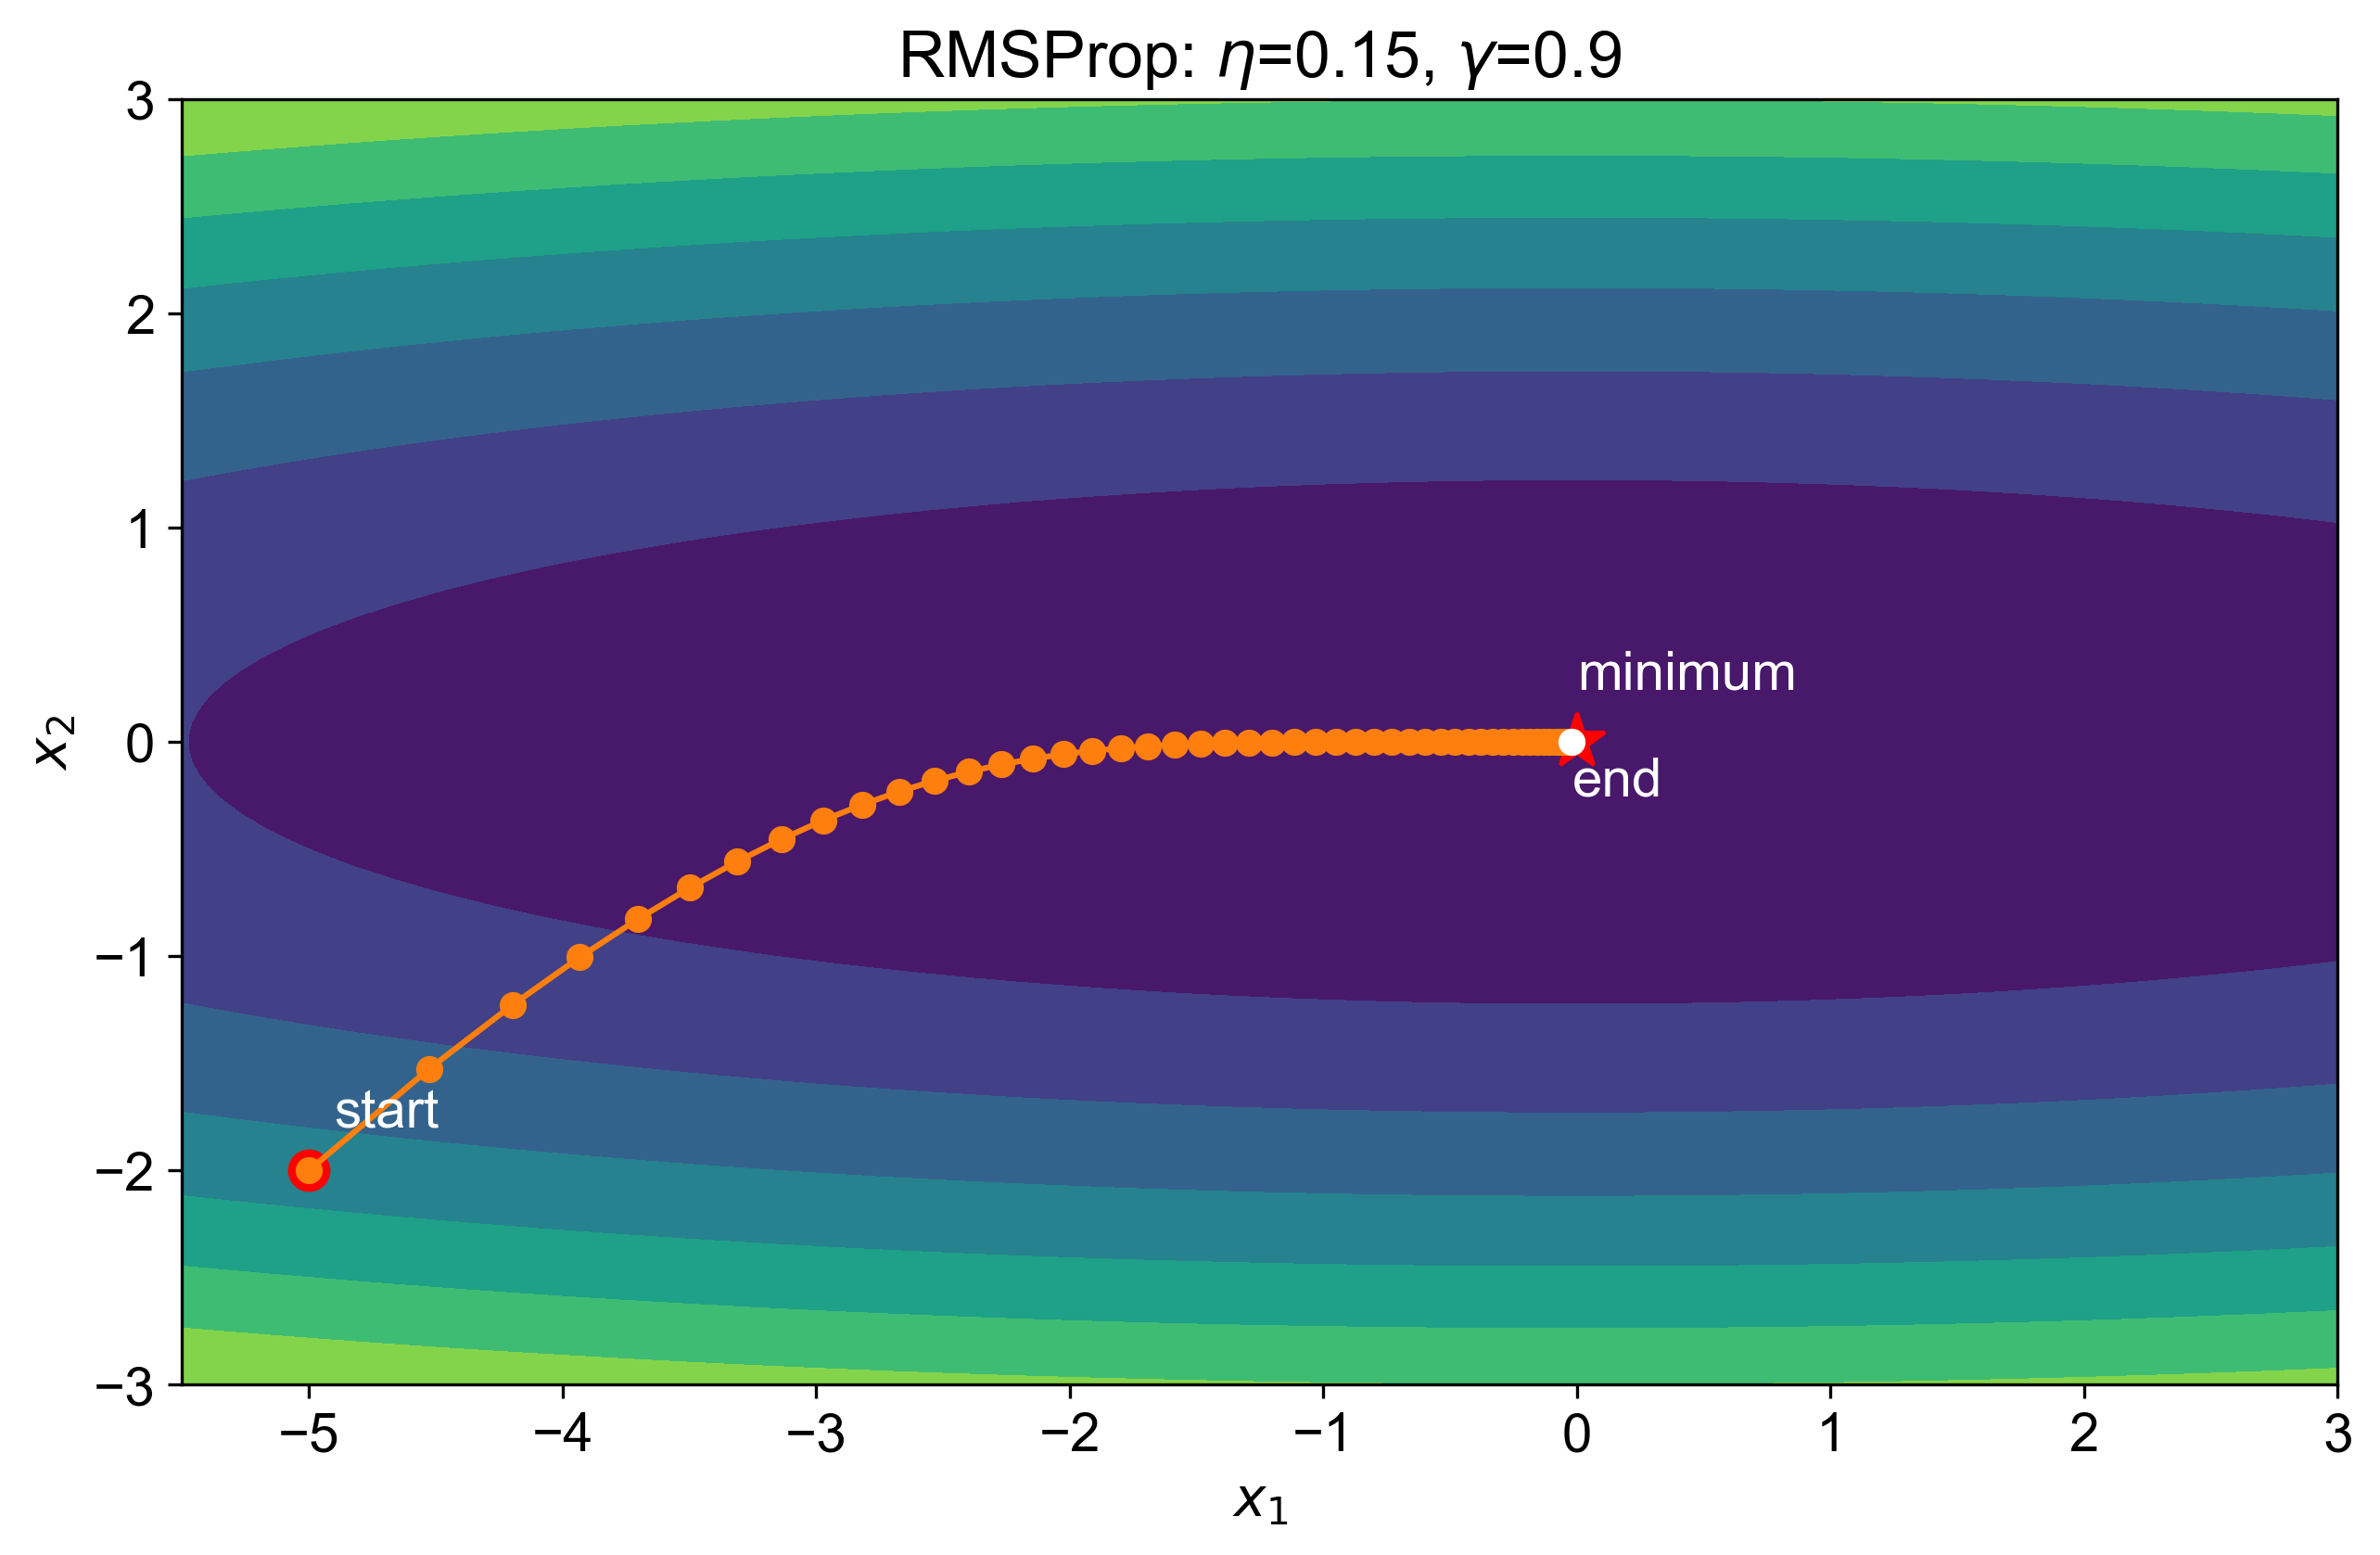

In [13]:
def visualize_rmsprop(lr=0.1, gamma=0.9):
    '''lr: learning rate, 
       gamma: momentum'''  
    def rmsprop_2d(x1, x2, s1, s2, lr):
        eps = 1e-6
        g1, g2 = f_grad(x1, x2)
        s1 = gamma * s1 + (1 - gamma) * g1 ** 2
        s2 = gamma * s2 + (1 - gamma) * g2 ** 2
        x1 -= lr / np.sqrt(s1 + eps) * g1
        x2 -= lr / np.sqrt(s2 + eps) * g2
        return x1, x2, s1, s2, lr

    res = train_2d(rmsprop_2d, lr)
    plot_2d([res], title=rf'RMSProp: $\eta$={lr}, $\gamma$={gamma}')

visualize_rmsprop(lr=0.15, gamma=0.9)

In [14]:
def adam_core(lr, m, n, g, t, beta1, beta2):
    '''Adam 优化算法的核心'''
    eps = 1.0E-8
    m = beta1 * m + (1 - beta1) * g
    n = beta2 * n + (1 - beta2) * g*g
    m_hat = m / (1 - beta1**t)
    n_hat = n / (1 - beta2**t)
    dx = lr * m_hat / (np.sqrt(n_hat) + eps)
    return m, n, dx

def visualize_adam(lr=0.1, beta1=0.9, beta2=0.999):
    ''' 可视化 Adam 优化算法的学习过程
    lr: learning rate
    beta1: parameter for E(g)
    beta2: parameter for E(g^2)
    '''    
    def adam_2d(x1, x2, m1, n1, m2, n2, lr, t):
        '''m1, m2: E(g1), E(g2)
           n1, n2: E(g1^2), E(g2^2) where E() is expectation
           lr: learning rate
           t: time step'''
        eps = 1e-6
        g1, g2 = f_grad(x1, x2)
        m1, n1, dx1 = adam_core(lr, m1, n1, g1, t, beta1, beta2)
        m2, n2, dx2 = adam_core(lr, m2, n2, g2, t, beta1, beta2)       
        x1 -= dx1
        x2 -= dx2
        return x1, x2, m1, n1, m2, n2, lr
    
    def train_adam(trainer, lr):
        """Train a 2d object function with a customized trainer"""
        x1, x2 = -5, -2
        m1, n1, m2, n2 = 0, 0, 0, 0
        res = [(x1, x2)]
        for i in range(100):
            x1, x2, m1, n1, m2, n2, lr = trainer(x1, x2, m1, n1, m2, n2, lr, i+1)
            res.append((x1, x2))
        return res
    
    res = train_adam(adam_2d, lr)
    plot_2d([res], title=rf'adam, $\eta$={lr}, $\beta_1$={beta1}, $\beta_2$={beta2}')

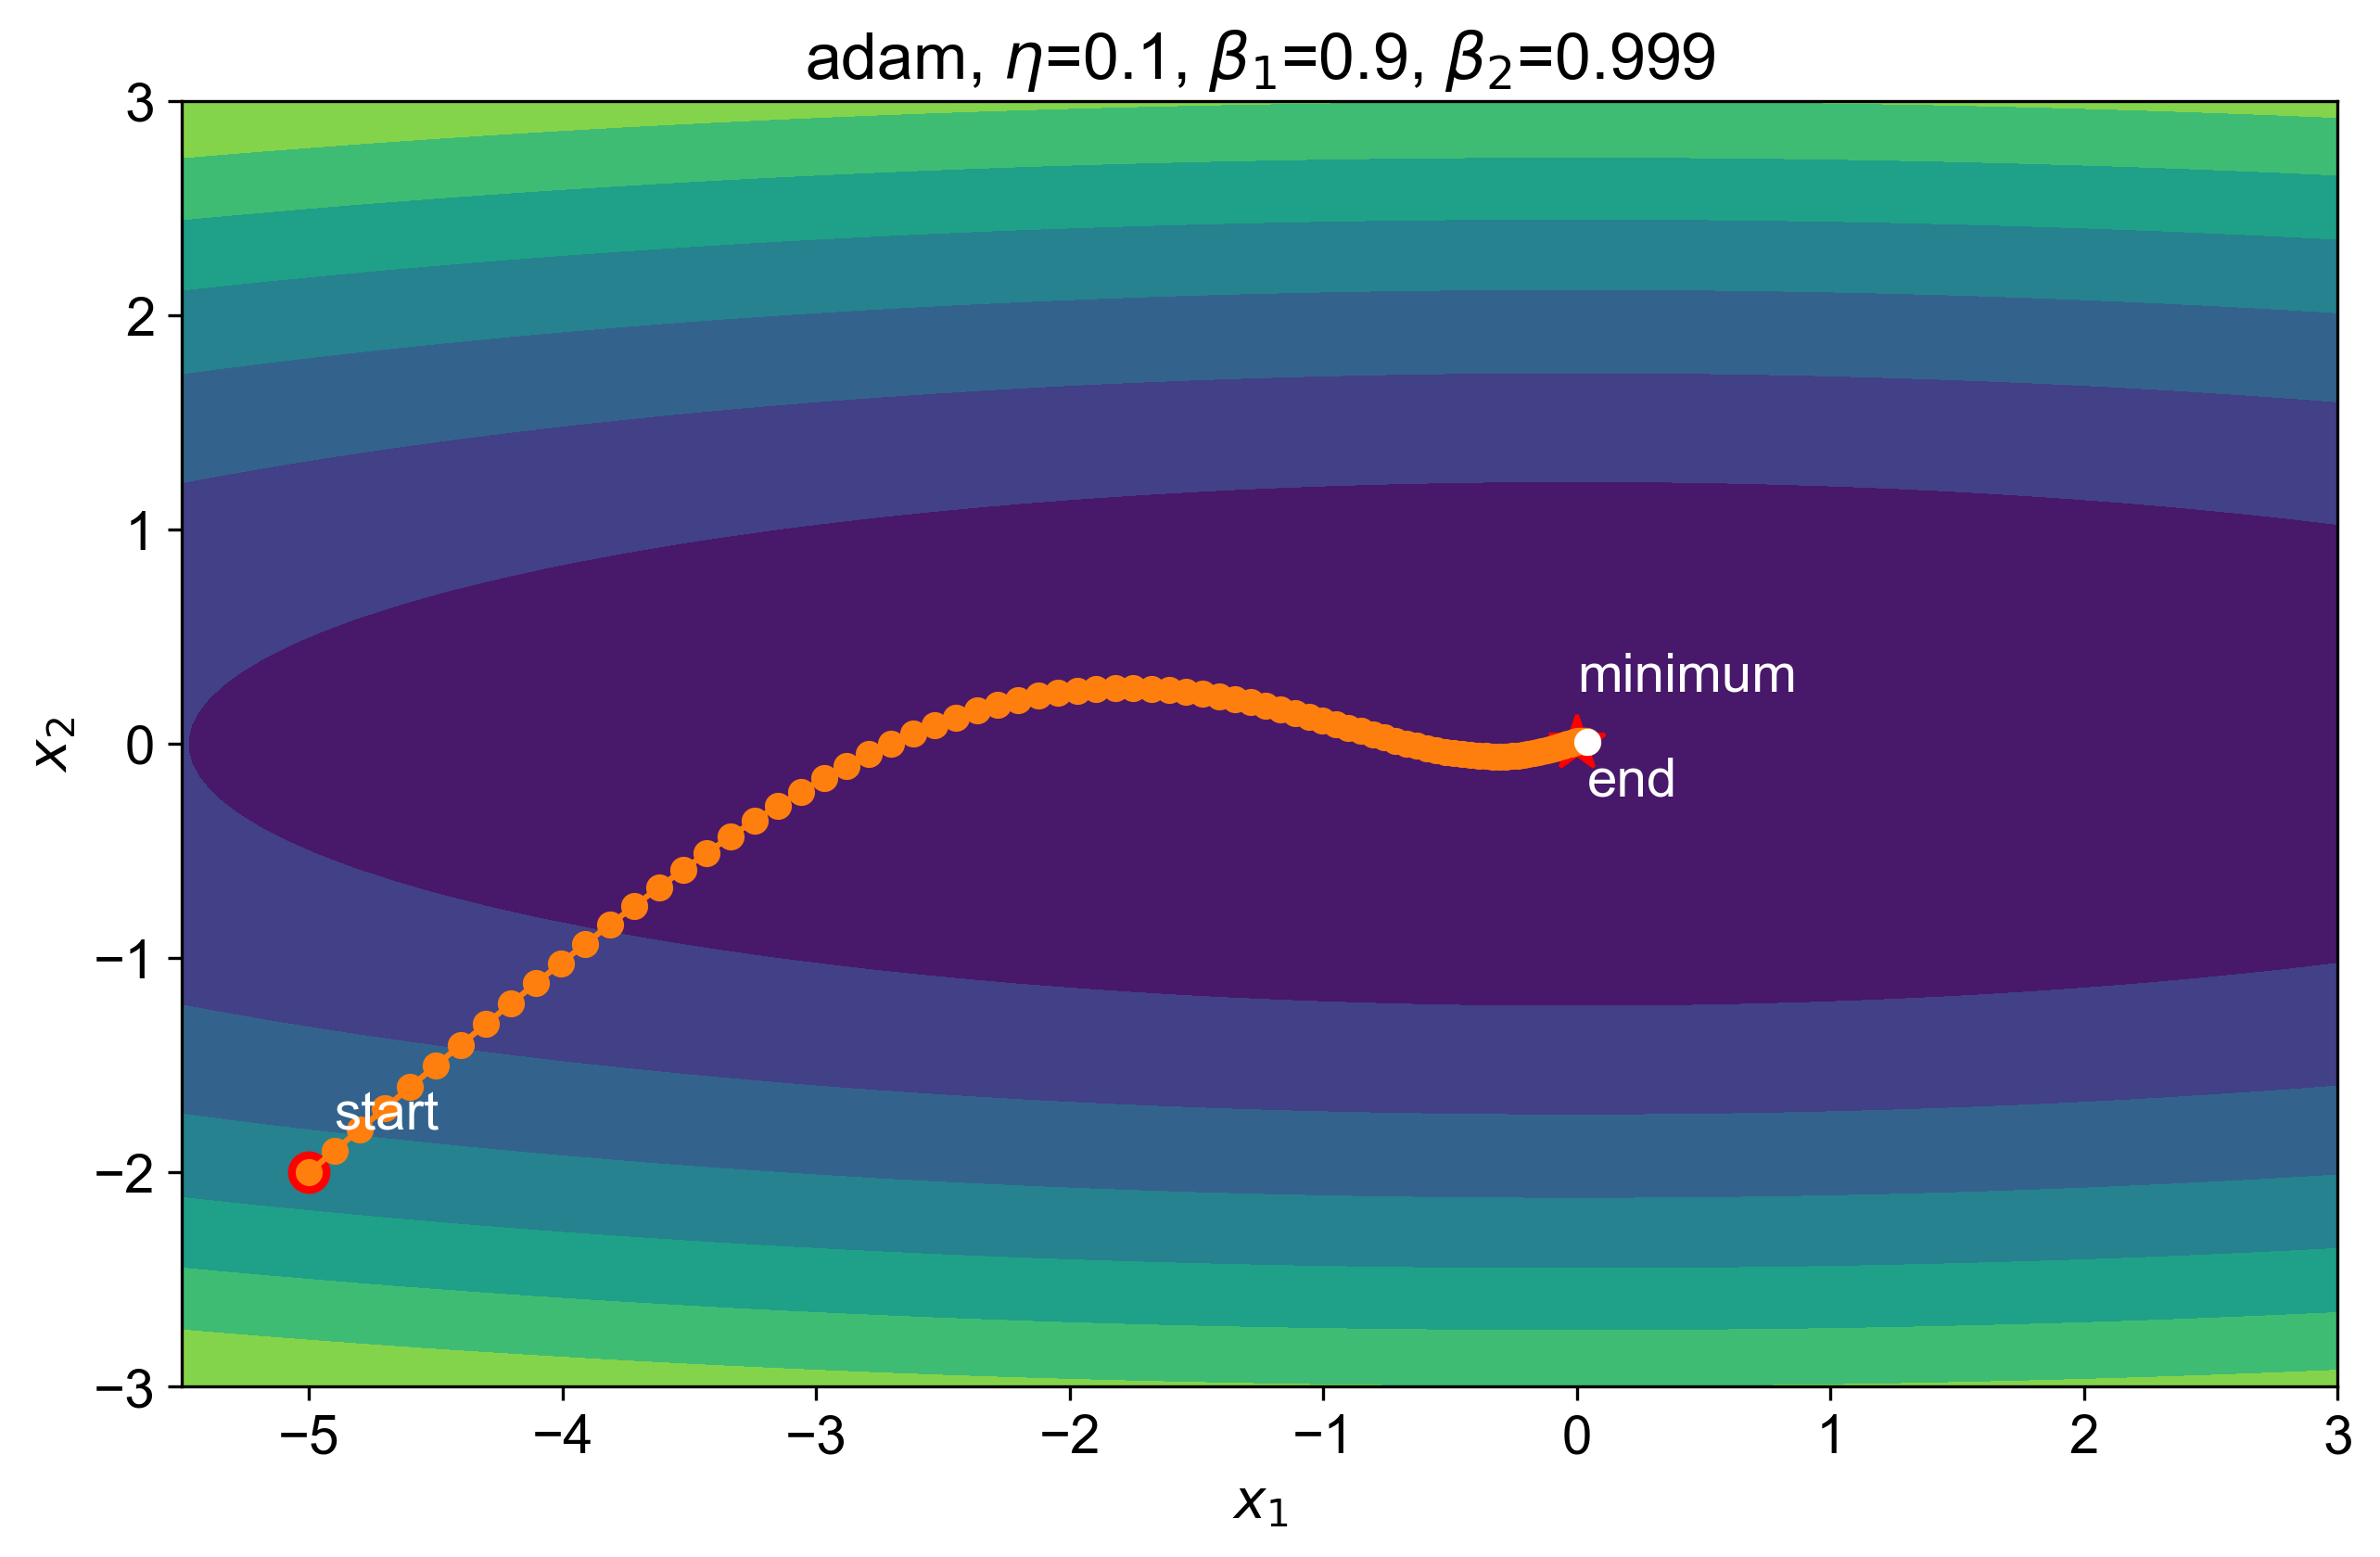

In [20]:
visualize_adam(lr=1e-1, beta1=0.9, beta2=0.999) 